In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [3]:
# LOAD THE DATASET :
df = pd.read_csv("../Data/raw/subset_data.csv")
# DISPLAY THE FIRST 5 ROWS :
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [4]:
# SHAPE OF THE DATASET :
print(f"Shape of the dataset : {df.shape}")

Shape of the dataset : (50000, 9)


In [7]:
# COLUMNS INFORMATIONS :
print("Column Count,Names and The data type (dtype) of each column :")
df.info()

Column Count,Names and The data type (dtype) of each column :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   review_id    50000 non-null  object 
 1   user_id      50000 non-null  object 
 2   business_id  50000 non-null  object 
 3   stars        50000 non-null  float64
 4   useful       50000 non-null  int64  
 5   funny        50000 non-null  int64  
 6   cool         50000 non-null  int64  
 7   text         50000 non-null  object 
 8   date         50000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 3.4+ MB


In [9]:
# STATISTICS OF NUMERICAL COLUMNS :
df.describe()

,stars,useful,funny,cool
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,3.848000,0.889540,0.250440,0.345060
std,1.350308,1.864481,0.941455,1.072388
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000,0.000000
max,5.000000,91.000000,38.000000,49.000000


In [11]:
# CHECKING FOR DUPLICATED VALUES :
df_duplicates = df.duplicated()
print(f"number of duplicated rows : {df_duplicates.sum()}")

number of duplicated rows : 0


In [13]:
# CHECKING FOR MISSING VALUES :
df.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

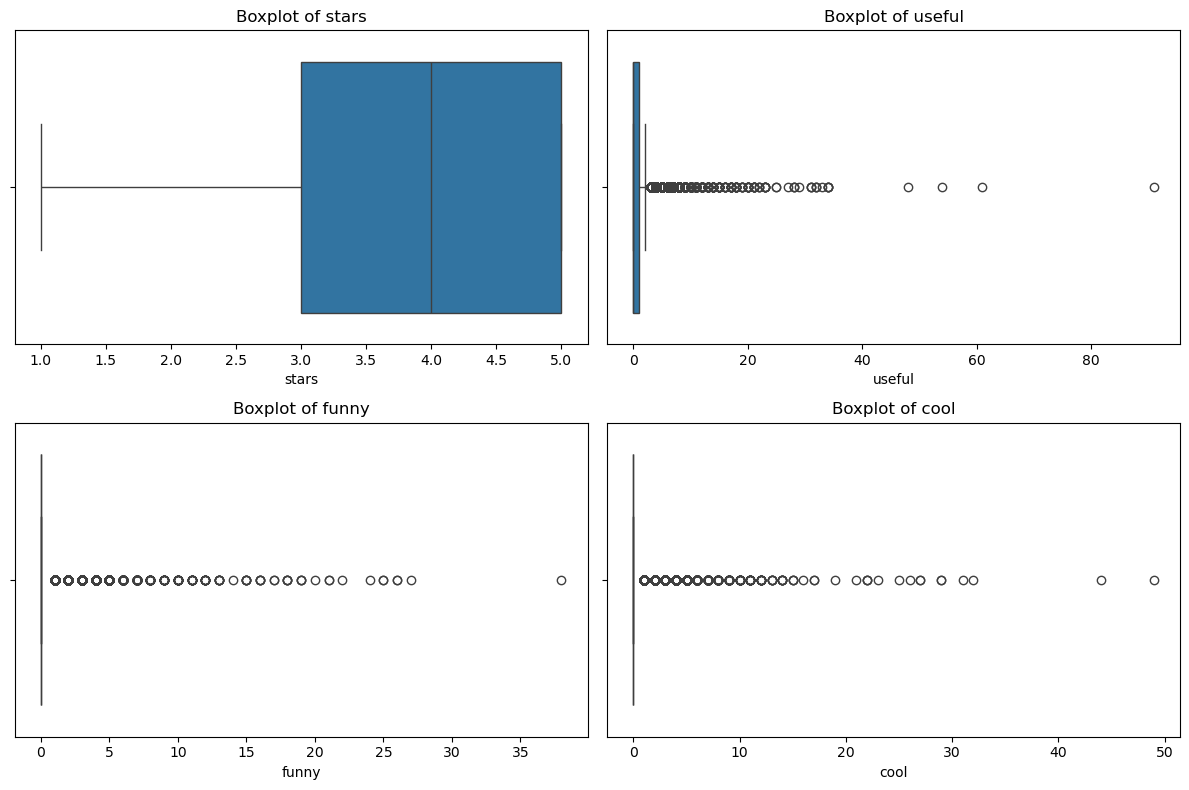

In [15]:
# CHECKING FOR OUTLIERS IN NUMERICAL COLUMNS :
plt.figure(figsize=(12, 8))

# Create a list of columns to plot
columns = ['stars', 'useful', 'funny', 'cool']

# Plot boxplots for each column
for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)  # Create 2x2 subplot
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

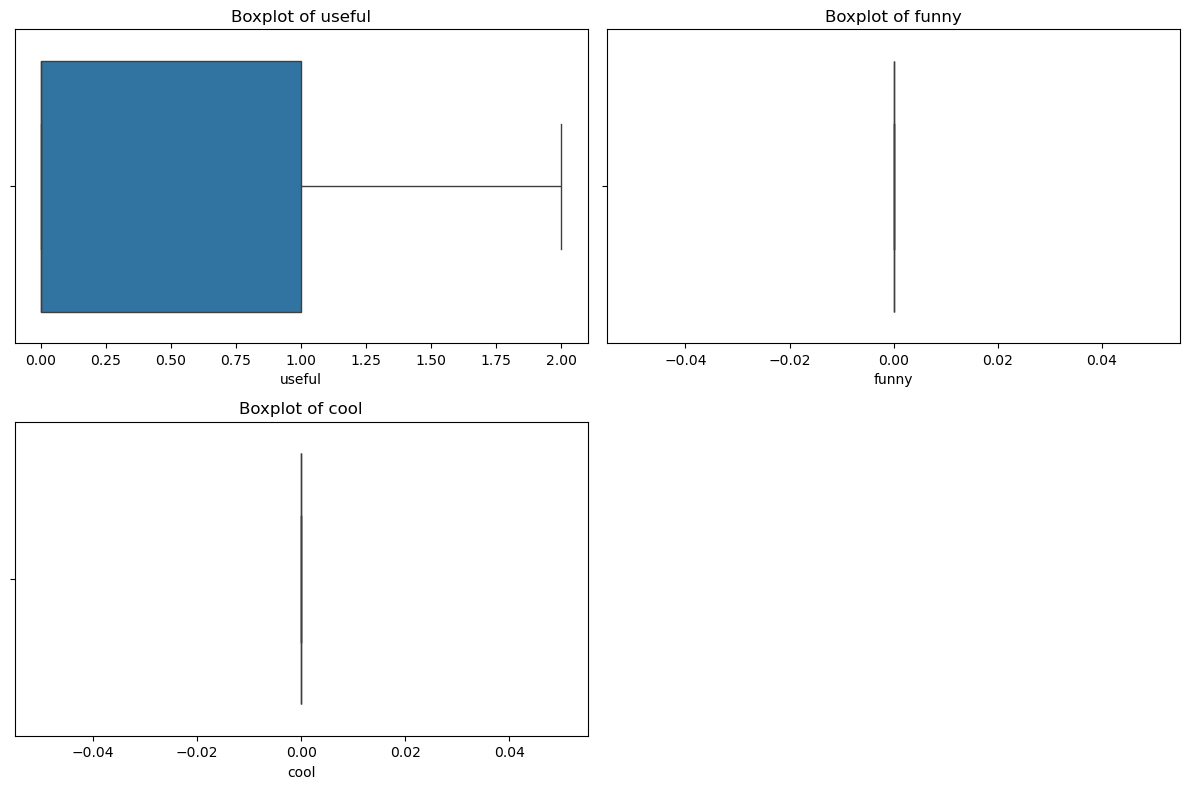

In [17]:
# HANDLING OUTLIERS USING IQR METHOD :
df_test_outliers = df.copy()
outliers_col = ['useful', 'funny', 'cool']

plt.figure(figsize=(12, 8))

# Loop through each column and handle outliers
for i, col in enumerate(outliers_col, 1):
    # Calculate IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Identify and drop outliers
    df_test_outliers = df_test_outliers[
        (df_test_outliers[col] >= lower_limit) & 
        (df_test_outliers[col] <= upper_limit)
    ]
    
    # Plot boxplot to visualize after outliers removal
    plt.subplot(2, 2, i)  # Create 2x2 subplot
    sns.boxplot(data = df_test_outliers, x=col)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

# Show all boxplots
plt.show()

In [19]:
# HOW MANY UNIQUE STARS :
print(df.stars.unique())
# DISTRIBUTION FOR EACH STAR VALUE :
star_counts = df.stars.value_counts()
star_counts

[3. 5. 4. 1. 2.]


stars
5.0    22220
4.0    12721
3.0     5677
1.0     5379
2.0     4003
Name: count, dtype: int64

In [21]:
# ASSINING EACH STAR VALUE A SENTIMENT :
df.loc[df['stars'] == 3, 'sentiment'] = 'neutral' 
df.loc[df['stars'] < 3, 'sentiment'] = 'negative' 
df.loc[df['stars'] > 3, 'sentiment'] = 'positive'

In [23]:
# NEW DATASET :
df_reviews = df[['sentiment','text']]
# DISPLAY THE FIRST 5 ROWS
df_reviews.head()

,sentiment,text
0,neutral,"If you decide to eat here, just be aware it is..."
1,positive,I've taken a lot of spin classes over the year...
2,neutral,Family diner. Had the buffet. Eclectic assortm...
3,positive,"Wow! Yummy, different, delicious. Our favo..."
4,positive,Cute interior and owner (?) gave us tour of up...


Text Preprocessing :

In [26]:
# PREPERING TEXT :
# Convert Text to Lowercase
df_reviews.loc[:,'text'] = df_reviews["text"].str.lower()
df_reviews.head()

,sentiment,text
0,neutral,"if you decide to eat here, just be aware it is..."
1,positive,i've taken a lot of spin classes over the year...
2,neutral,family diner. had the buffet. eclectic assortm...
3,positive,"wow! yummy, different, delicious. our favo..."
4,positive,cute interior and owner (?) gave us tour of up...


In [28]:
# Removal of Punctuations !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
import string

PUNCT_TO_REMOVE = string.punctuation

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df_reviews.loc[:,"text"] = df_reviews["text"].apply(lambda text: remove_punctuation(text))
df_reviews.head()

,sentiment,text
0,neutral,if you decide to eat here just be aware it is ...
1,positive,ive taken a lot of spin classes over the years...
2,neutral,family diner had the buffet eclectic assortmen...
3,positive,wow yummy different delicious our favorite...
4,positive,cute interior and owner gave us tour of upcom...


In [30]:
# Removal of Numbers
df_reviews.loc[:,'text'] = df_reviews['text'].str.replace(r'\d+', '', regex=True) 
df_reviews.head()

,sentiment,text
0,neutral,if you decide to eat here just be aware it is ...
1,positive,ive taken a lot of spin classes over the years...
2,neutral,family diner had the buffet eclectic assortmen...
3,positive,wow yummy different delicious our favorite...
4,positive,cute interior and owner gave us tour of upcom...


In [32]:
# Replace Newline and Carriage Return Characters
df_reviews.loc[:,'text'] = df_reviews['text'].str.replace('\n',' ', regex=True).str.replace('\r','', regex=True)
df_reviews.head()

,sentiment,text
0,neutral,if you decide to eat here just be aware it is ...
1,positive,ive taken a lot of spin classes over the years...
2,neutral,family diner had the buffet eclectic assortmen...
3,positive,wow yummy different delicious our favorite...
4,positive,cute interior and owner gave us tour of upcom...


In [34]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CHAKOR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\CHAKOR\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [36]:
# Removal of stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df_reviews.loc[:, "text"] = df_reviews["text"].apply(lambda text: remove_stopwords(text))
df_reviews.head()

,sentiment,text
0,neutral,decide eat aware going take hours beginning en...
1,positive,ive taken lot spin classes years nothing compa...
2,neutral,family diner buffet eclectic assortment large ...
3,positive,wow yummy different delicious favorite lamb cu...
4,positive,cute interior owner gave us tour upcoming pati...


In [38]:
# lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df_reviews.loc[:,'text'] = df_reviews['text'].apply(lemmatize_text)
df_reviews.head()

,sentiment,text
0,neutral,decide eat aware going take hour beginning end...
1,positive,ive taken lot spin class year nothing compare ...
2,neutral,family diner buffet eclectic assortment large ...
3,positive,wow yummy different delicious favorite lamb cu...
4,positive,cute interior owner gave u tour upcoming patio...


In [40]:
# Removing Extra space
df_reviews.loc[:,'text'] = df_reviews['text'].str.replace(r'\s+', ' ', regex=True).str.strip()
df_reviews.head()

,sentiment,text
0,neutral,decide eat aware going take hour beginning end...
1,positive,ive taken lot spin class year nothing compare ...
2,neutral,family diner buffet eclectic assortment large ...
3,positive,wow yummy different delicious favorite lamb cu...
4,positive,cute interior owner gave u tour upcoming patio...


In [44]:
# Tokenization
from nltk.tokenize import word_tokenize

df_reviews.loc[:,'tokens'] = df_reviews['text'].apply(word_tokenize)
df_reviews.head()

,sentiment,text,tokens
0,neutral,decide eat aware going take hour beginning end...,"[decide, eat, aware, going, take, hour, beginn..."
1,positive,ive taken lot spin class year nothing compare ...,"[ive, taken, lot, spin, class, year, nothing, ..."
2,neutral,family diner buffet eclectic assortment large ...,"[family, diner, buffet, eclectic, assortment, ..."
3,positive,wow yummy different delicious favorite lamb cu...,"[wow, yummy, different, delicious, favorite, l..."
4,positive,cute interior owner gave u tour upcoming patio...,"[cute, interior, owner, gave, u, tour, upcomin..."


In [45]:
# CREATING A NEW COLUMN IN THE DATASET FOR THE NUMBER OF WORDS IN THE REVIEW
df_reviews.loc[:, 'length'] = df_reviews['text'].apply(len)
df_reviews.head()

C:\Users\CHAKOR\AppData\Local\Temp\ipykernel_13772\3506292104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews.loc[:, 'length'] = df_reviews['text'].apply(len)


,sentiment,text,tokens,length
0,neutral,decide eat aware going take hour beginning end...,"[decide, eat, aware, going, take, hour, beginn...",275
1,positive,ive taken lot spin class year nothing compare ...,"[ive, taken, lot, spin, class, year, nothing, ...",540
2,neutral,family diner buffet eclectic assortment large ...,"[family, diner, buffet, eclectic, assortment, ...",260
3,positive,wow yummy different delicious favorite lamb cu...,"[wow, yummy, different, delicious, favorite, l...",150
4,positive,cute interior owner gave u tour upcoming patio...,"[cute, interior, owner, gave, u, tour, upcomin...",380


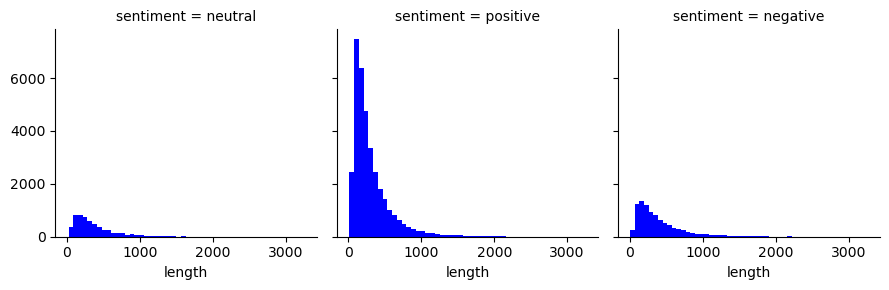

In [47]:
# COMPARING TEXT LENGTH TO SENTIMENT
graph = sns.FacetGrid(data=df_reviews,col='sentiment')
graph.map(plt.hist,'length',bins=50,color='blue')

sentiment
positive    34941
negative     9382
neutral      5677
Name: count, dtype: int64


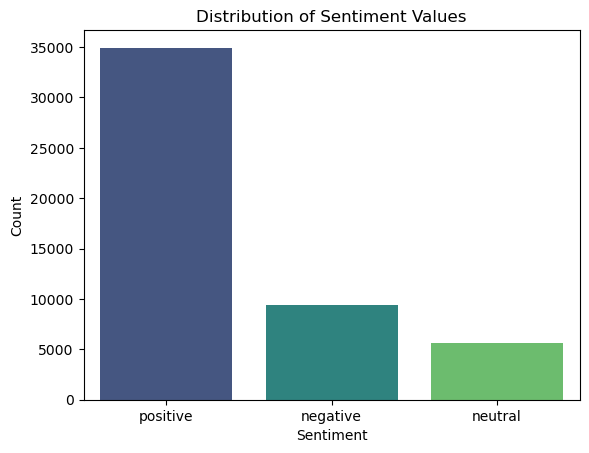

In [49]:
# VISUALIZING THE DISTRIBUTION OF SENTIMENT VALUES :
sentiment = df_reviews['sentiment'].value_counts()
print(sentiment)

# Convert to a DataFrame for sns.barplot compatibility
sentiment_counts_df = sentiment.reset_index()
sentiment_counts_df.columns = ['sentiment', 'count']

# Create a bar plot for the distribution of sentiment values
sns.barplot(data=sentiment_counts_df, x='sentiment', y='count',hue='sentiment', palette="viridis",legend=False)

# Adding title and labels
plt.title('Distribution of Sentiment Values')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Show the plot
plt.show()